<a href="https://colab.research.google.com/github/BrianChegeGichau/Diagnosticsystem/blob/main/Copy_of_IntelligentDiagnoticSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.0 Reading and Exploration

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Reading and viewing the first few rows in our data
plc = pd.read_excel("PLC Dataset (1).xlsx")
plc.head(2)

,Fault Code,Fault,Diagnostic,Corrective Action,PLC,Model
0,NaN,Cracked glass failure,Broken or cracked glass electrode,Replace electrode if cracked.,Emerson,Model 54e
1,NaN,Cracked glass failure,Broken or cracked glass electrode,Check wiring for short.,Emerson,Model 54e


In [ ]:
plc.tail(2)

,Fault Code,Fault,Diagnostic,Corrective Action,PLC,Model
1265,1005,AD status was detected.,BAD was detected because of the xx block data ...,Check the status of the device or communication.,Yokogawa,Stardom
1266,9001,Internal error.,Some system factor (such as insufficient resou...,Check the system status using the Windows mana...,Yokogawa,Stardom


## 2.0 Data Understanding

In [ ]:
#Finding out the shape of our dataset
print('The dataset has ', plc.shape[1], 'columns and ', plc.shape[0], 'rows.')

The dataset has  6 columns and  1267 rows.


Our data has 6 columns which are:

1.   Fault Code
2.   Fault
3.   Diagnostic
4.   Corrective Action
5.   Company
6.   Model

The machines with company namely Emerson do not have a Fault Code according to our data source ie. manuals therefore we won't be using the fault codes for this specific company to predict a fault.



In [ ]:
#Checking for null values in the dataset
plc.isnull().sum()

Fault Code           232
Fault                  0
Diagnostic             0
Corrective Action      1
PLC                    0
Model                  0
dtype: int64

We having a missing 92 values in the Fault Code column specifically to the Emerson company.

In [ ]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
plc.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fault Code         1035 non-null   object
 1   Fault              1267 non-null   object
 2   Diagnostic         1267 non-null   object
 3   Corrective Action  1266 non-null   object
 4   PLC                1267 non-null   object
 5   Model              1267 non-null   object
dtypes: object(6)
memory usage: 59.5+ KB
-----------------------------------------------------------------------


In [ ]:
# check the unique values in the data set
for column in plc.columns:
  print("***************************", column, "********************************")
  print("This column has", plc[column].nunique(), "unique values, they are shown below:\n")
  print(plc[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** Fault Code ********************************
This column has 799 unique values, they are shown below:

[nan 11.103 13.32 13.48 13.76 13.136 13.181 13.422 13.52 13.4003 13.404
 13.4241 13.4343 13.4341 13.4366 13.4589 15.20533 16.5016 30.5 30.484
 30.504 30.53 30.473 32.282 33.384 33.511 33.8242 33.8256 33.16399
 33.16654 33.16662 33.16917 33.16944 33.17072 33.17074 33.17077 33.17088
 33.17104 33.17106 33.17108 33.17109 33.1711 33.3354 33.33794 33.34562
 33.53315 33.53346 33.53347 33.53797 33.53798 33.53824 33.59906 34.11
 34.21 34.152 34.168 34.173 34.178 34.4355 34.4461 34.4469 88.47 256.24
 256.26 256.3 256.31 256.32 256.49 256.53 256.56 256.57 256.62 256.68
 256.89 256.92 256.93 256.94 256.1 256.104 256.111 256.119 257.8 257.9
 257.24 257.26 257.79 257.94 258.1 258.17 276.42 288.48 289.2 289.25
 289.35 291.416 291.56 292.19 293.1 294.6 294.23 294.27 295.17248
 295.20486 300.13 314.8 724.21 1230.2001 1230.2009 1230.2015 1230.2016
 1230.2018 2508.1099 2517.5 

## 3.0 Data Analytics

In this segment it's important to understand the fault that occurs the most, to enhance our fault prediction.

In [ ]:
#Printing the columns
plc.columns

Index(['Fault Code', 'Fault', 'Diagnostic', 'Corrective Action', 'PLC',
       'Model'],
      dtype='object')

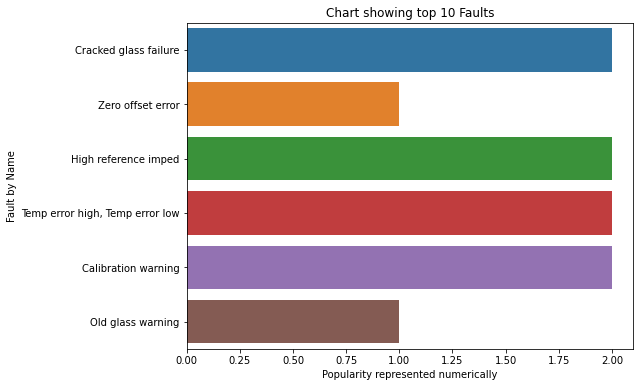

In [ ]:
#Sort faults by their popularity
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating a bar plot using seaborn inbuilt barplot
sns.countplot(y =plc['Fault'].head(10), data = plc)
plt.xlabel('Popularity represented numerically')
plt.ylabel('Fault by Name')
plt.title('Chart showing top 10 Faults')
plt.show()

Some of the frequent faults are:


*   Cracked Glass Failure
*   High Reference imped
*   Temp error high, Temp error low
*   Calibration Warning



## 4.0 Diagnosis and Corrective Action Prediction

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.4 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#Replace NaN with an empty string
plc[['Fault','PLC','Model']] = plc[['Fault','PLC','Model']].fillna('')

In [ ]:
plc[['Diagnostic','Corrective Action']] = plc[['Diagnostic','Corrective Action']].fillna('')

In [ ]:

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(plc[['Fault','PLC','Model']])


In [ ]:
tfidf_matrix

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier


In [ ]:
Xfeatures = plc[['Fault','PLC','Model']].values
ylabels = plc[['Diagnostic','Corrective Action']].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [ ]:
pipe_lr.fit(x_train,y_train)

AttributeError: ignored

In [ ]:
plc.head(2)

,Fault Code,Fault,Diagnostic,Corrective Action,PLC,Model
0,NaN,Cracked glass failure,Broken or cracked glass electrode,Replace electrode if cracked.,Emerson,Model 54e
1,NaN,Cracked glass failure,Broken or cracked glass electrode,Check wiring for short.,Emerson,Model 54e


In [ ]:
#Defining the predictor variables and target column
X = train.drop(['survived'],axis=1)
y = train['survived']
#Importing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Standardizing our numerical columns which are the age and fare columns
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])
#One hot encoding any categorical columns in our dataset
X = pd.get_dummies(X, drop_first=True)
#Splitting our dataset into the test and train 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

# 4.0 Diagnosis Prediction by Faults

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
plc['Diagnostic'] = plc['Diagnostic'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(plc['Diagnostic'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(610, 1161)

There are 1161 words that explain the 610 faults in our dataset.

We shall be using the cosine similarity to calculate a numeric quantity that shows the similarity between two diagnostics. We will be using the cosine similiarity since it is independent of magnitude and relatively easy and fast to calculate.

We shall be using the sklearn's linear kernel since we already have the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(plc.index, index=plc['Fault']).drop_duplicates()

In [ ]:
# Function that takes in Faults as input and predicts diagnosis
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the Fault that matches the Diagnosis
    idx = indices[title]

    # Get the pairwsie similarity scores of all Diagnosis 
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the Diagnosis based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar diagnosis
    sim_scores = sim_scores[1:11]

    # Get the fault indices
    fault_indices = [i[0] for i in sim_scores]

    # Return the top 10 most likely faults.
    return plc['Faults'].iloc[fault_indices]

In [ ]:
#Applying the function to the fault 'Cracked Glass Failure'
get_recommendations('Cracked glass failure')

ValueError: ignored